In [2]:
import scanpy as sc
import pandas as pd
import plotly.express as px

In [7]:
path_folder = '/home/BS94_SUR/phD/review/datasets/trajectory inference'

In [8]:
adata = sc.read_h5ad(path_folder + '/' +'covid_pbmc.h5ad')
adata

/opt/conda/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 18752 × 33538
    obs: 'batch', 'batch2'
    var: 'ENS'

In [9]:
adata.obs

batch  batch2
AAACCTGAGCGATTCT-1  P1-day1-rep1  PZ-1r1
AAACCTGCAGCTGTGC-1  P1-day1-rep1  PZ-1r1
AAACCTGCATCGGTTA-1  P1-day1-rep1  PZ-1r1
AAACGGGAGAAACCTA-1  P1-day1-rep1  PZ-1r1
AAACGGGAGACGCACA-1  P1-day1-rep1  PZ-1r1
...                          ...     ...
TTTGTCAGTCATACTG-7       P2-day7    PW-3
TTTGTCAGTTAAGGGC-7       P2-day7    PW-3
TTTGTCAGTTACAGAA-7       P2-day7    PW-3
TTTGTCAGTTCCGGCA-7       P2-day7    PW-3
TTTGTCATCAGAGACG-7       P2-day7    PW-3

[18752 rows x 2 columns]

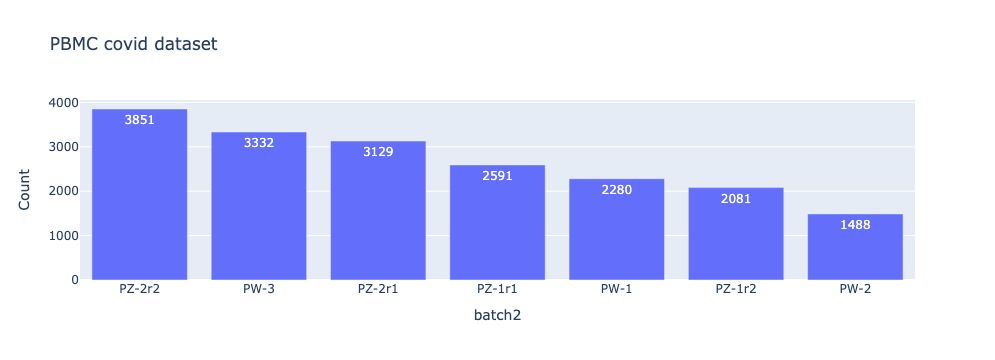

In [14]:
value_counts = adata.obs['batch2'].value_counts().reset_index()
value_counts.columns = ["batch2", "Count"]

fig = px.bar(value_counts, x="batch2", y="Count", text="Count", title=f"PBMC covid dataset")
fig.show()

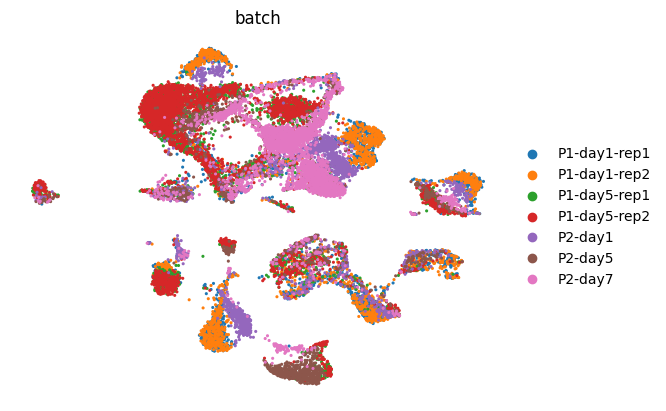

In [12]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_pcs=50)
sc.tl.umap(adata)
sc.pl.umap(adata, color="batch", frameon=False, size=20)

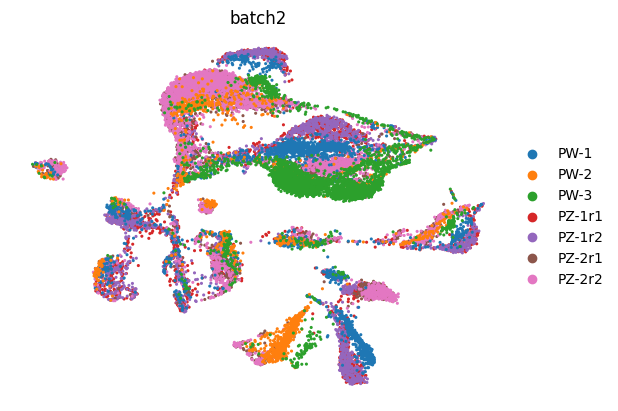

In [13]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata, n_pcs=50)
sc.tl.umap(adata)
sc.pl.umap(adata, color="batch2", frameon=False, size=20)